This notebook is a first attempt to work with the data provided by the Max-Planck-Institute for Legal History and Legal Theory as it is provided on the https://policey.rg.mpg.de/web/

As a case within the A Game of Thrones?! NWO Veni project focusses on the Canton Berne, the data available within 'die Datenbank Policeyordnungen der Frühen Neuzeit' forms a logical entry to contextualise the sources found within the StABE.

In [1]:
#cell1

import pandas as pd
#load Pandas for data structures and operations for manipulating numerical tables and time series.
import numpy as np
#Load NumPy for linear algebra/ Numerical Python
data = pd.read_csv ('data_csv/policey_bern.csv')

print (data)

#loading the data from the .csv-file
# having an overview of the columns (and number of rows)

# Important: in Policey_bern are the UNIQUE laws per date available. These are 4932 laws. 
# However, these laws have a lot of 'matters' within one cel. 

                LawID  URI LegislatorID  \
0     BER.01.001.4968  NaN   BER.01.001   
1     BER.01.001.0001  NaN   BER.01.001   
2     BER.01.001.0002  NaN   BER.01.001   
3     BER.01.001.0003  NaN   BER.01.001   
4     BER.01.001.0004  NaN   BER.01.001   
...               ...  ...          ...   
4927  BER.01.001.4832  NaN   BER.01.001   
4928  BER.01.001.4833  NaN   BER.01.001   
4929  BER.01.001.4834  NaN   BER.01.001   
4930  BER.01.001.4835  NaN   BER.01.001   
4931  BER.01.001.4836  NaN   BER.01.001   

                                         LegislatorName  LegislatorTitle  \
0     Schultheiß und Kleiner und Großer Rat der Stad...              NaN   
1     Schultheiß und Kleiner und Großer Rat der Stad...              NaN   
2     Schultheiß und Kleiner und Großer Rat der Stad...              NaN   
3     Schultheiß und Kleiner und Großer Rat der Stad...              NaN   
4     Schultheiß und Kleiner und Großer Rat der Stad...              NaN   
...                        

In [2]:
#cell2

import pandas as pd
#load Pandas for data structures and operations for manipulating numerical tables and time series.
import numpy as np
#Load NumPy for linear algebra/ Numerical Python
data = pd.read_csv ('data_csv_output/bern_matters_expanded.csv')

print (data)

#This is the single table inheritance (according to JvZ) made by Marysia Winkels.

                LawID                 SubLawID  CategoryNumber  \
0     BER.01.001.4968  BER.01.001.4968.06412.0             4.2   
1     BER.01.001.0001  BER.01.001.0001.00001.0             1.1   
2     BER.01.001.0001  BER.01.001.0001.00004.0             1.1   
3     BER.01.001.0001  BER.01.001.0001.00002.0             1.1   
4     BER.01.001.0001  BER.01.001.0001.00006.0             1.1   
...               ...                      ...             ...   
7561  BER.01.001.4832  BER.01.001.4832.06175.2             4.6   
7562  BER.01.001.4833  BER.01.001.4833.06176.0             1.4   
7563  BER.01.001.4834  BER.01.001.4834.06177.0             2.3   
7564  BER.01.001.4835  BER.01.001.4835.06178.0             4.6   
7565  BER.01.001.4836  BER.01.001.4836.06179.0             2.3   

                     MainCategory    SecondaryCategory  \
0         Forst- und Bodennutzung                Forst   
1        Religionsangelegenheiten        Geistlichkeit   
2        Religionsangelegenheiten

In [3]:
# cell3

bern = (
    pd.read_csv('data_csv_output/bern_matters_expanded.csv')
    .rename(str.lower, axis='columns')
)
bern.head()

#lower the column-names without capitals

,lawid,sublawid,categorynumber,maincategory,secondarycategory,subcategories,uri,legislatorid,legislatorname,legislatortitle,...,relatesto,publication,archive,title,facs,url,matters,dirty,controlled,links
0,BER.01.001.4968,BER.01.001.4968.06412.0,4.2,Forst- und Bodennutzung,Forst,"Forstfrevel,Kein näheres Datum",NaN,BER.01.001,Schultheiß und Kleiner und Großer Rat der Stad...,NaN,...,NaN,NaN,"StAB, A I 480, S. 231",Verpott in der Statt Wäldenn khein Holz zefellen.,NaN,NaN,"(BER.01.001.4968.06412.0,,4.2,Forst- und Boden...",NaN,NaN,NaN
1,BER.01.001.0001,BER.01.001.0001.00001.0,1.1,Religionsangelegenheiten,Geistlichkeit,Amtsausübung; Amtsführung; Predigt; Aufsicht; ...,NaN,BER.01.001,Schultheiß und Kleiner und Großer Rat der Stad...,NaN,...,NaN,NaN,"StAB, A I 479, fol. 1v-10v",NaN,NaN,NaN,"(BER.01.001.0001.00001.0,,1.1,Religionsangeleg...",NaN,NaN,NaN
2,BER.01.001.0001,BER.01.001.0001.00004.0,1.1,Religionsangelegenheiten,Kirchenzucht,Fasten; Toleranz; Messe,NaN,BER.01.001,Schultheiß und Kleiner und Großer Rat der Stad...,NaN,...,NaN,NaN,"StAB, A I 479, fol. 1v-10v",NaN,NaN,NaN,"(BER.01.001.0001.00001.0,,1.1,Religionsangeleg...",NaN,NaN,NaN
3,BER.01.001.0001,BER.01.001.0001.00002.0,1.1,Religionsangelegenheiten,Kirchenorganisation,Pfarrstellenbesetzung; Abgaben; Vermögen; Stif...,NaN,BER.01.001,Schultheiß und Kleiner und Großer Rat der Stad...,NaN,...,NaN,NaN,"StAB, A I 479, fol. 1v-10v",NaN,NaN,NaN,"(BER.01.001.0001.00001.0,,1.1,Religionsangeleg...",NaN,NaN,NaN
4,BER.01.001.0001,BER.01.001.0001.00006.0,1.1,Religionsangelegenheiten,Klosterwesen/Orden,Verbot; Austritt; Bruderschaft,NaN,BER.01.001,Schultheiß und Kleiner und Großer Rat der Stad...,NaN,...,NaN,NaN,"StAB, A I 479, fol. 1v-10v",NaN,NaN,NaN,"(BER.01.001.0001.00001.0,,1.1,Religionsangeleg...",NaN,NaN,NaN


In [4]:
# cell 4

data.info()
# Information what is included in the .csv
# This incl. which columns, how much information and type of data is available in these columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7566 entries, 0 to 7565
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   LawID                7566 non-null   object 
 1   SubLawID             7566 non-null   object 
 2   CategoryNumber       7566 non-null   float64
 3   MainCategory         7566 non-null   object 
 4   SecondaryCategory    7566 non-null   object 
 5   SubCategories        7506 non-null   object 
 6   URI                  0 non-null      float64
 7   LegislatorID         7566 non-null   object 
 8   LegislatorName       7566 non-null   object 
 9   LegislatorTitle      0 non-null      float64
 10  LegislatorReligion   7566 non-null   object 
 11  LegislatorRuleBegin  7566 non-null   int64  
 12  LegislatorRuleEnd    7566 non-null   int64  
 13  TerID                7566 non-null   object 
 14  TerShortLabel        7566 non-null   object 
 15  TerSeq               7566 non-null   i

In [5]:
#cell 5

print (data.columns)
#short index overview of what is included in the columns (column-names)

Index(['LawID', 'SubLawID', 'CategoryNumber', 'MainCategory',
       'SecondaryCategory', 'SubCategories', 'URI', 'LegislatorID',
       'LegislatorName', 'LegislatorTitle', 'LegislatorReligion',
       'LegislatorRuleBegin', 'LegislatorRuleEnd', 'TerID', 'TerShortLabel',
       'TerSeq', 'TerLabel', 'TerOrg', 'TerOrgID', 'TerType1', 'TerType2',
       'TerReligion', 'TerDistrict', 'TerPublished', 'TerEditor', 'TerLitList',
       'TerAbbrevList', 'TerPreface', 'Datum', 'Date1', 'Date', 'Year',
       'Month', 'Day', 'Form', 'Scope', 'RelatesTo', 'Publication', 'Archive',
       'Title', 'Facs', 'URL', 'Matters', 'Dirty', 'Controlled', 'Links'],
      dtype='object')


In [6]:
#cell 6

df = pd.read_csv('data_csv_output/bern_matters_expanded.csv', index_col=0)
#the index_col parameter to select the first column of data as the index
df

,SubLawID,CategoryNumber,MainCategory,SecondaryCategory,SubCategories,URI,LegislatorID,LegislatorName,LegislatorTitle,LegislatorReligion,...,RelatesTo,Publication,Archive,Title,Facs,URL,Matters,Dirty,Controlled,Links
LawID,,,,,,,,,,,,,,,,,,,,,
BER.01.001.4968,BER.01.001.4968.06412.0,4.2,Forst- und Bodennutzung,Forst,"Forstfrevel,Kein näheres Datum",NaN,BER.01.001,Schultheiß und Kleiner und Großer Rat der Stad...,NaN,EV,...,NaN,NaN,"StAB, A I 480, S. 231",Verpott in der Statt Wäldenn khein Holz zefellen.,NaN,NaN,"(BER.01.001.4968.06412.0,,4.2,Forst- und Boden...",NaN,NaN,NaN
BER.01.001.0001,BER.01.001.0001.00001.0,1.1,Religionsangelegenheiten,Geistlichkeit,Amtsausübung; Amtsführung; Predigt; Aufsicht; ...,NaN,BER.01.001,Schultheiß und Kleiner und Großer Rat der Stad...,NaN,EV,...,NaN,NaN,"StAB, A I 479, fol. 1v-10v",NaN,NaN,NaN,"(BER.01.001.0001.00001.0,,1.1,Religionsangeleg...",NaN,NaN,NaN
BER.01.001.0001,BER.01.001.0001.00004.0,1.1,Religionsangelegenheiten,Kirchenzucht,Fasten; Toleranz; Messe,NaN,BER.01.001,Schultheiß und Kleiner und Großer Rat der Stad...,NaN,EV,...,NaN,NaN,"StAB, A I 479, fol. 1v-10v",NaN,NaN,NaN,"(BER.01.001.0001.00001.0,,1.1,Religionsangeleg...",NaN,NaN,NaN
BER.01.001.0001,BER.01.001.0001.00002.0,1.1,Religionsangelegenheiten,Kirchenorganisation,Pfarrstellenbesetzung; Abgaben; Vermögen; Stif...,NaN,BER.01.001,Schultheiß und Kleiner und Großer Rat der Stad...,NaN,EV,...,NaN,NaN,"StAB, A I 479, fol. 1v-10v",NaN,NaN,NaN,"(BER.01.001.0001.00001.0,,1.1,Religionsangeleg...",NaN,NaN,NaN
BER.01.001.0001,BER.01.001.0001.00006.0,1.1,Religionsangelegenheiten,Klosterwesen/Orden,Verbot; Austritt; Bruderschaft,NaN,BER.01.001,Schultheiß und Kleiner und Großer Rat der Stad...,NaN,EV,...,NaN,NaN,"StAB, A I 479, fol. 1v-10v",NaN,NaN,NaN,"(BER.01.001.0001.00001.0,,1.1,Religionsangeleg...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BER.01.001.4832,BER.01.001.4832.06175.2,4.6,Handel und Dienstleistungen,Versorgung,Getreide; Privilegien; Ausfuhr,NaN,BER.01.001,Schultheiß und Kleiner und Großer Rat der Stad...,NaN,EV,...,NaN,NaN,"StAB, A I 513, S. 582-584",Der freye Getreid Ankauf auf allen Jahr und Wo...,NaN,NaN,"(BER.01.001.4832.06175.1,,4.6,Handel und Diens...",NaN,NaN,NaN
BER.01.001.4833,BER.01.001.4833.06176.0,1.4,Aufwand und Luxus,Kleidung,Ehrenorden,NaN,BER.01.001,Schultheiß und Kleiner und Großer Rat der Stad...,NaN,EV,...,NaN,NaN,"StAB, A I 513, S. 610 f.",Das Tragen der französischen Ordenszeichen [.....,NaN,NaN,"(BER.01.001.4833.06176.0,,1.4,Aufwand und Luxu...",NaN,NaN,NaN
BER.01.001.4834,BER.01.001.4834.06177.0,2.3,Zensur und Buchdruck,Zensur,Druckschriften; Verbreitung; Politisch,NaN,BER.01.001,Schultheiß und Kleiner und Großer Rat der Stad...,NaN,EV,...,NaN,NaN,"StAB, A I 514, S. 7-10","Das Journal, [...] zur Geschichte des Standes ...",NaN,NaN,"(BER.01.001.4834.06177.0,,2.3,Zensur und Buchd...",NaN,NaN,NaN


In [7]:
#cell 7

df ['Year']

LawID
BER.01.001.4968    1528
BER.01.001.0001    1528
BER.01.001.0001    1528
BER.01.001.0001    1528
BER.01.001.0001    1528
                   ... 
BER.01.001.4832    1797
BER.01.001.4833    1797
BER.01.001.4834    1797
BER.01.001.4835    1798
BER.01.001.4836    1798
Name: Year, Length: 7566, dtype: int64

<AxesSubplot:>

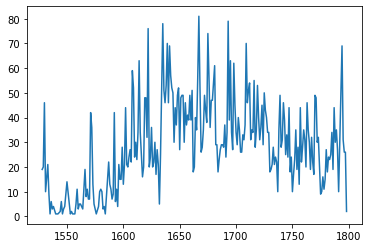

In [8]:
#cell 8

# I need the column 'Year' because I want to make a bar graph or a line graph (a table would be nice too).
# I need these years to be staked on top of each other (so all the 1536 examples of laws need to be on top of each other)
# The x-as shows all the years.
# The y-as shows the amount.


series = df['Year'].value_counts()
series = series.sort_index()
series.plot.line()

# pandas count distinct values in column


In [9]:
# cell 9

type( df['Year'].value_counts())

pandas.core.series.Series

In [10]:
# cell 10

# I need the column 'Matters' or "Categorynumber"
# This column contains an enormous amount of data, which needs to be seperated: as done in "bern_matters_expanded.csv".
#lower the column-names without capitals

bern = (
    pd.read_csv('data_csv_output/bern_matters_expanded.csv')
    .rename(str.lower, axis='columns')
)
bern.head()

,lawid,sublawid,categorynumber,maincategory,secondarycategory,subcategories,uri,legislatorid,legislatorname,legislatortitle,...,relatesto,publication,archive,title,facs,url,matters,dirty,controlled,links
0,BER.01.001.4968,BER.01.001.4968.06412.0,4.2,Forst- und Bodennutzung,Forst,"Forstfrevel,Kein näheres Datum",NaN,BER.01.001,Schultheiß und Kleiner und Großer Rat der Stad...,NaN,...,NaN,NaN,"StAB, A I 480, S. 231",Verpott in der Statt Wäldenn khein Holz zefellen.,NaN,NaN,"(BER.01.001.4968.06412.0,,4.2,Forst- und Boden...",NaN,NaN,NaN
1,BER.01.001.0001,BER.01.001.0001.00001.0,1.1,Religionsangelegenheiten,Geistlichkeit,Amtsausübung; Amtsführung; Predigt; Aufsicht; ...,NaN,BER.01.001,Schultheiß und Kleiner und Großer Rat der Stad...,NaN,...,NaN,NaN,"StAB, A I 479, fol. 1v-10v",NaN,NaN,NaN,"(BER.01.001.0001.00001.0,,1.1,Religionsangeleg...",NaN,NaN,NaN
2,BER.01.001.0001,BER.01.001.0001.00004.0,1.1,Religionsangelegenheiten,Kirchenzucht,Fasten; Toleranz; Messe,NaN,BER.01.001,Schultheiß und Kleiner und Großer Rat der Stad...,NaN,...,NaN,NaN,"StAB, A I 479, fol. 1v-10v",NaN,NaN,NaN,"(BER.01.001.0001.00001.0,,1.1,Religionsangeleg...",NaN,NaN,NaN
3,BER.01.001.0001,BER.01.001.0001.00002.0,1.1,Religionsangelegenheiten,Kirchenorganisation,Pfarrstellenbesetzung; Abgaben; Vermögen; Stif...,NaN,BER.01.001,Schultheiß und Kleiner und Großer Rat der Stad...,NaN,...,NaN,NaN,"StAB, A I 479, fol. 1v-10v",NaN,NaN,NaN,"(BER.01.001.0001.00001.0,,1.1,Religionsangeleg...",NaN,NaN,NaN
4,BER.01.001.0001,BER.01.001.0001.00006.0,1.1,Religionsangelegenheiten,Klosterwesen/Orden,Verbot; Austritt; Bruderschaft,NaN,BER.01.001,Schultheiß und Kleiner und Großer Rat der Stad...,NaN,...,NaN,NaN,"StAB, A I 479, fol. 1v-10v",NaN,NaN,NaN,"(BER.01.001.0001.00001.0,,1.1,Religionsangeleg...",NaN,NaN,NaN


,lawid,sublawid,categorynumber,maincategory,secondarycategory,subcategories,uri,legislatorid,legislatorname,legislatortitle,...,publication,archive,title,facs,url,matters,dirty,controlled,links,categorynumber_main
0,BER.01.001.4968,BER.01.001.4968.06412.0,4.2,Forst- und Bodennutzung,Forst,"Forstfrevel,Kein näheres Datum",NaN,BER.01.001,Schultheiß und Kleiner und Großer Rat der Stad...,NaN,...,NaN,"StAB, A I 480, S. 231",Verpott in der Statt Wäldenn khein Holz zefellen.,NaN,NaN,"(BER.01.001.4968.06412.0,,4.2,Forst- und Boden...",NaN,NaN,NaN,4.0
1,BER.01.001.0001,BER.01.001.0001.00001.0,1.1,Religionsangelegenheiten,Geistlichkeit,Amtsausübung; Amtsführung; Predigt; Aufsicht; ...,NaN,BER.01.001,Schultheiß und Kleiner und Großer Rat der Stad...,NaN,...,NaN,"StAB, A I 479, fol. 1v-10v",NaN,NaN,NaN,"(BER.01.001.0001.00001.0,,1.1,Religionsangeleg...",NaN,NaN,NaN,1.0
2,BER.01.001.0001,BER.01.001.0001.00004.0,1.1,Religionsangelegenheiten,Kirchenzucht,Fasten; Toleranz; Messe,NaN,BER.01.001,Schultheiß und Kleiner und Großer Rat der Stad...,NaN,...,NaN,"StAB, A I 479, fol. 1v-10v",NaN,NaN,NaN,"(BER.01.001.0001.00001.0,,1.1,Religionsangeleg...",NaN,NaN,NaN,1.0
3,BER.01.001.0001,BER.01.001.0001.00002.0,1.1,Religionsangelegenheiten,Kirchenorganisation,Pfarrstellenbesetzung; Abgaben; Vermögen; Stif...,NaN,BER.01.001,Schultheiß und Kleiner und Großer Rat der Stad...,NaN,...,NaN,"StAB, A I 479, fol. 1v-10v",NaN,NaN,NaN,"(BER.01.001.0001.00001.0,,1.1,Religionsangeleg...",NaN,NaN,NaN,1.0
4,BER.01.001.0001,BER.01.001.0001.00006.0,1.1,Religionsangelegenheiten,Klosterwesen/Orden,Verbot; Austritt; Bruderschaft,NaN,BER.01.001,Schultheiß und Kleiner und Großer Rat der Stad...,NaN,...,NaN,"StAB, A I 479, fol. 1v-10v",NaN,NaN,NaN,"(BER.01.001.0001.00001.0,,1.1,Religionsangeleg...",NaN,NaN,NaN,1.0


<BarContainer object of 5 artists>

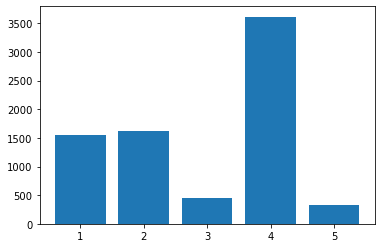

In [11]:
#cell 11

import matplotlib.pyplot as plt

# Even een kopie om geen schade te veroorzaken.
c_bern = bern

# Je wilt groeperen op de 'main' category, dus moeten we die groepeerbaar maken.
# We voegen daarom de op eenheden afgeronde categoriewaarde toe als kolom.
c_bern[ 'categorynumber_main' ] = bern[ 'categorynumber' ].apply( 'floor' )
display( c_bern.head() ) # Kijk: extra kolom helemaal achteraan met alleen het hoofdnummer van de categorie.

# De rest ken je al, counts en plotten.
s = c_bern['categorynumber_main'].value_counts().sort_index()
# Wel een "bar" plot gebruiken ipv een "line" plot, natuurlijk.
plt.bar( s.index, s.values )


In [12]:
# cell 11.1

# Pff.. deze bezorgt me hoofdbrekens. Je wilt de subcategorieën tonen in 'stacked bars'.
# Dat kan, maar het is niet de normale use case voor stacked bars want dan 
# heb je in alle kolommen dezelfde categoriën. Dat is hier niet het geval.

# Oké, weer even een kopie en een kolom voor de hoofdcategorieën invoegen.
c_bern = bern
c_bern[ 'categorynumber_main' ] = bern[ 'categorynumber' ].apply( 'floor' )

# Nu de counts/grouping die we nodig hebbenn
s = c_bern['categorynumber'].value_counts().sort_index()

# We slopen uit `s` voor elke staaf de data die we voor die staat nodig hebben.
# Hier is waarschijnlijk een veel betere functie voor in Pandas maar ik kan hem niet vinden.
bars = dict()
for idx_value in c_bern[ 'categorynumber_main' ].unique():
    bars[ idx_value ] = s[ (s.index >= idx_value ) & ( s.index < idx_value + 1 ) ]

# De cijfers voor 1 staaf zijn dus de aantallen in de subcategoriën, maar niet alle
# staven hebben evenveel subcategorieën. En dat is een probleem omdat we met plot.bar
# alleen kunnen stapelen als we steeds series van gelijke grote hebben, dat wil zeggen:
# voor elke subcategorie in elke staaf een waarde. Een serie is dan de waarden van
# één subcategorie over alle staven heen. 
# HACK: dit lossen we op door in staven met te weinig subcategoriën de overige categorieën
# te 'faken'. Dit is dus al een zeer twijfelachtige stap, want je suggereert dat er meer
# categorieën zijn en dat daarin nul items zitten.
n_bars = dict()
for bar in bars.values():
    bar_cat = round( bar.index[0] )
    if len( bar.values ) < 7:
        num_zeros = 7 - len( bar.values )
        bar = bar.append( pd.Series( np.zeros( (1,num_zeros) )[0] ) )
    bar.index = np.arange( 0.1, 0.8, 0.1 )
    n_bars[ bar_cat ] = bar

# Maar goed, met die hack hebben we dan wel een net dataframe:
df_n_bars = pd.DataFrame( n_bars )
display( df_n_bars )


,4,1,2,3,5
0.1,366,781,199.0,139.0,65.0
0.2,276,185,856.0,289.0,137.0
0.3,41,319,63.0,21.0,75.0
0.4,49,79,504.0,0.0,46.0
0.5,120,170,0.0,0.0,0.0
0.6,2285,3,0.0,0.0,0.0
0.7,478,20,0.0,0.0,0.0


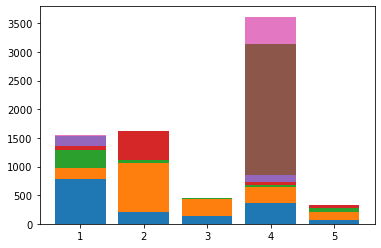

In [13]:
# cel 11.2

# Nu nog afbeelden.
# Dat bar_bottom gedoe zorgt ervoor dat de bottom van elke subcategorie netjes op
# de bovenkant van de staaf van de vorige subcategorie terecht komt.

plt.bar( df_n_bars.columns, df_n_bars.loc[ df_n_bars.index[0] ] )
bar_bottom = df_n_bars.loc[ df_n_bars.index[0] ]
for idx in df_n_bars.index[1:]:
    plt.bar( df_n_bars.columns, df_n_bars.loc[ idx ], bottom=bar_bottom )
    bar_bottom += df_n_bars.loc[ idx ]

In [14]:
# cell 11.3

# Nota bene: dit moet je dus echt niet doen hè, volgens mij. Je suggereert allerlei verbanden tussen de categorieën
# die er niet zijn. Als je iets van verdeling over subcategorieën wil zien in de hoofdcategoriën, kun je misschien
# beter een taartdiagram per categorie maken? Is denk ik ook een stuk leesbaarder.
# Wat misschien nog wel zou kunnen, een 100% stacked plot…

# Daarvoor transponeren we de zaak…
df_nn_bars = df_n_bars.T
display( df_nn_bars )

,0.1,0.2,0.3,0.4,0.5,0.6,0.7
4,366.0,276.0,41.0,49.0,120.0,2285.0,478.0
1,781.0,185.0,319.0,79.0,170.0,3.0,20.0
2,199.0,856.0,63.0,504.0,0.0,0.0,0.0
3,139.0,289.0,21.0,0.0,0.0,0.0,0.0
5,65.0,137.0,75.0,46.0,0.0,0.0,0.0


In [15]:
# cell 11.4

# Per catergorie (rij) rekenen we de percentuele bijdrage uit 
# van elke subcategorie (kolom).
df_nn_bars = df_nn_bars.div( df_nn_bars.sum( axis=1 ), axis=0 )
display( df_nn_bars )

,0.1,0.2,0.3,0.4,0.5,0.6,0.7
4,0.101245,0.076349,0.011342,0.013555,0.033195,0.632089,0.132227
1,0.501606,0.118818,0.204881,0.050739,0.109184,0.001927,0.012845
2,0.122688,0.527744,0.038841,0.310727,0.000000,0.000000,0.000000
3,0.309577,0.643653,0.046771,0.000000,0.000000,0.000000,0.000000
5,0.201238,0.424149,0.232198,0.142415,0.000000,0.000000,0.000000


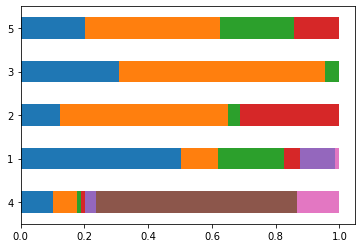

In [16]:
# cell 11.5
# En dan plotten we een 100% stack:
hbar_plot = df_nn_bars.plot( kind='barh', stacked=True )

# De legenda staat er anders overheen, maar hij sugereert ook heeeel verkeerde dingen.
hbar_plot.get_legend().remove()

# Maar ja, meer dan iets dat het misschien wel aardig doet op de jas van een generaal in
# een land waar dat soort dingen nog indruk maken is het ook niet.

<BarContainer object of 5 artists>

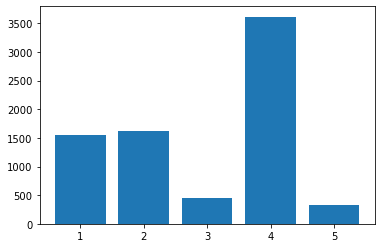

In [17]:
#cell 12
# In this column's cells, the ordinances are categorised. Each topic has a number in accordance with:https://policey.rg.mpg.de/web/assets/03_systematik_index_policeymaterien.pdf 
# In these 'matters'-cells several topics (or just one) are listed as e.g. 1.3 marginalised groups (Randgruppen) followed by several subcategories.
# Within this example 1.3; 1.3 is a subordinate to 1. 

import matplotlib.pyplot as plt
%matplotlib inline
s = c_bern['categorynumber_main'].value_counts().sort_index()
plt.bar(s.index, s.values )

#NB This graph is not a bar and it is not a combined "stack of everything 1.1-1.5/ 2.1-2.4; etc"

In [18]:
# So, 1.3, Randgruppen is followed by ",," and then the subgroup follows. (secondary categories and subcategories)
# Each of the "main-subcategories" seems to be organised by ( ) which starts with the geographical area (BER.01.001.xxxx)

# plot these as linegraphs (year as the x-as) while chosing topics (e.g. main categories OR secondary categories)
# plot multiple lines

In [19]:
bern.groupby('maincategory')


In [20]:
list(bern
    .groupby(['maincategory', 'year'])
)




[(("'Industrielle' Produktion", 1612),
                 lawid                 sublawid  categorynumber  \
  983  BER.01.001.4889  BER.01.001.4889.06248.0             4.3   
  
                    maincategory secondarycategory subcategories  uri  \
  983  'Industrielle' Produktion        Produktion        Pulver  NaN   
  
      legislatorid                                     legislatorname  \
  983   BER.01.001  Schultheiß und Kleiner und Großer Rat der Stad...   
  
       legislatortitle  ... publication                  archive  \
  983              NaN  ...         NaN  StAB, A I 482, S. 36 f.   
  
                                                   title facs url  \
  983  Vonn Salpetter Grabens, Siedens, unnd Pulver M...  NaN NaN   
  
                                                 matters dirty  controlled  \
  983  (BER.01.001.4889.06247.0,,4.2,Forst- und Boden...   NaN         NaN   
  
       links categorynumber_main  
  983    NaN                 4.0  
  
  [1 rows x 47

In [21]:
# I want to select everything that is either starting with matters 1 or 2 (but the other's I like to use for graphs too)
# I want to create line-graphs that show the different topics within "1" (public order) or "2" (social order)
# Aim: to show the development over time of these topics.

In [22]:
bern = (
    pd.read_csv('data_csv_output/bern_matters_expanded.csv')
    .rename(str.lower, axis='columns')
)
bern.head()

,lawid,sublawid,categorynumber,maincategory,secondarycategory,subcategories,uri,legislatorid,legislatorname,legislatortitle,...,relatesto,publication,archive,title,facs,url,matters,dirty,controlled,links
0,BER.01.001.4968,BER.01.001.4968.06412.0,4.2,Forst- und Bodennutzung,Forst,"Forstfrevel,Kein näheres Datum",NaN,BER.01.001,Schultheiß und Kleiner und Großer Rat der Stad...,NaN,...,NaN,NaN,"StAB, A I 480, S. 231",Verpott in der Statt Wäldenn khein Holz zefellen.,NaN,NaN,"(BER.01.001.4968.06412.0,,4.2,Forst- und Boden...",NaN,NaN,NaN
1,BER.01.001.0001,BER.01.001.0001.00001.0,1.1,Religionsangelegenheiten,Geistlichkeit,Amtsausübung; Amtsführung; Predigt; Aufsicht; ...,NaN,BER.01.001,Schultheiß und Kleiner und Großer Rat der Stad...,NaN,...,NaN,NaN,"StAB, A I 479, fol. 1v-10v",NaN,NaN,NaN,"(BER.01.001.0001.00001.0,,1.1,Religionsangeleg...",NaN,NaN,NaN
2,BER.01.001.0001,BER.01.001.0001.00004.0,1.1,Religionsangelegenheiten,Kirchenzucht,Fasten; Toleranz; Messe,NaN,BER.01.001,Schultheiß und Kleiner und Großer Rat der Stad...,NaN,...,NaN,NaN,"StAB, A I 479, fol. 1v-10v",NaN,NaN,NaN,"(BER.01.001.0001.00001.0,,1.1,Religionsangeleg...",NaN,NaN,NaN
3,BER.01.001.0001,BER.01.001.0001.00002.0,1.1,Religionsangelegenheiten,Kirchenorganisation,Pfarrstellenbesetzung; Abgaben; Vermögen; Stif...,NaN,BER.01.001,Schultheiß und Kleiner und Großer Rat der Stad...,NaN,...,NaN,NaN,"StAB, A I 479, fol. 1v-10v",NaN,NaN,NaN,"(BER.01.001.0001.00001.0,,1.1,Religionsangeleg...",NaN,NaN,NaN
4,BER.01.001.0001,BER.01.001.0001.00006.0,1.1,Religionsangelegenheiten,Klosterwesen/Orden,Verbot; Austritt; Bruderschaft,NaN,BER.01.001,Schultheiß und Kleiner und Großer Rat der Stad...,NaN,...,NaN,NaN,"StAB, A I 479, fol. 1v-10v",NaN,NaN,NaN,"(BER.01.001.0001.00001.0,,1.1,Religionsangeleg...",NaN,NaN,NaN


In [23]:
# Import pandas package 
import pandas as pd

bern = (
    pd.read_csv('data_csv_output/bern_matters_expanded.csv')
    .rename(str.lower, axis='columns')
)

# Convert the dictionary into DataFrame 
df = pd.DataFrame(bern)

 
# Get the unique values of 'Main category' column
df.maincategory.unique()

#to have an overview of the topics listed in the 'maincategory'


array(['Forst- und Bodennutzung', 'Religionsangelegenheiten',
       'Vergnügungen; Öffentliche Leichtfertigkeit',
       'Zensur und Buchdruck', 'Policey der Verwaltung und Justiz',
       'Öffentliche Sicherheit; Kriminalität',
       'Sittlichkeit; Ehe- und Familie; Sexualität', 'Aufwand und Luxus',
       'Handwerk und Gewerbe', 'Handel und Dienstleistungen',
       'Landwirtschaft', 'Geld- und Kreditwesen', 'Sozialwesen',
       'Randgruppen', 'Gesundheitswesen',
       'Bevölkerungs- und Standeswesen; Herrschaftsverfassung',
       'Vormundschaftswesen', 'Grundstücks- und Bodenordnung', 'Wasser',
       'Straßen; Verkehr und Post', 'Bauwesen und Infrastruktur',
       'Erziehungswesen; Kultur', "'Industrielle' Produktion",
       'Arbeitsordnung', 'Erbschaftswesen'], dtype=object)

In [24]:
bern.groupby('maincategory')

In [25]:
df.maincategory.value_counts()

#to have an overview of the topics in the category 'maincategory' and a count of the occurences

Handel und Dienstleistungen                              2285
Öffentliche Sicherheit; Kriminalität                      856
Religionsangelegenheiten                                  781
Policey der Verwaltung und Justiz                         504
Geld- und Kreditwesen                                     478
Landwirtschaft                                            366
Randgruppen                                               319
Sozialwesen                                               289
Forst- und Bodennutzung                                   276
Vergnügungen; Öffentliche Leichtfertigkeit                199
Bevölkerungs- und Standeswesen; Herrschaftsverfassung     185
Sittlichkeit; Ehe- und Familie; Sexualität                170
Gesundheitswesen                                          139
Straßen; Verkehr und Post                                 137
Handwerk und Gewerbe                                      120
Aufwand und Luxus                                          79
Grundstü

In [26]:
# Convert the dictionary into DataFrame 
df = pd.DataFrame(bern)
 
# Get the unique values of 'Secondary Category' column
df.secondarycategory.unique()

array(['Forst', 'Geistlichkeit', 'Kirchenzucht', 'Kirchenorganisation',
       'Klosterwesen/Orden', 'Konfession', 'Religiöse Unterweisung',
       'Zutrinken/Trunksucht', 'Zensur', 'Feiertage/Religiöse Feste',
       'Verfahren', 'Kriegslauf/Kriegsdienst', 'Ehescheidung',
       'Eheschließung', 'Ehebruch', 'Unzucht', 'Zuständigkeiten Gerichte',
       'Gotteslästerung', 'Kleidung', 'Glücksspiel', 'Waffenführung',
       'Schneider', 'Prostitution/Kuppelei', 'Amtsführung/Amtsmißbrauch',
       'Fürkauf', 'Ernteordnung/Feudalabgaben', 'Kreditwesen',
       'Münzwesen', 'Wucher', 'Militär/Soldaten', 'Sicherung Stadt/Land',
       'Fischfang', 'Jagd', 'Sonntagsheiligung',
       'Müßiggang/Verschwendung', 'Tanzen', 'Bettel',
       'Handelsbedingungen', 'Hausierer/Krämer', 'Markt/Messe',
       'Maße & Gewichte', 'Bewirtung/Gaststätten', 'Fahrende Leute',
       'Zigeuner', 'Armenwesen', 'Kranke/Krankheiten',
       'Bigamie/Doppelehe', 'Sekten/Ketzerei', 'Aufenthalt',
       'Familie/Eh

In [27]:
df.secondarycategory.value_counts()

#count and topics in secondarycategory

Handelsbedingungen                741
Versorgung                        496
Münzwesen                         385
Militär/Soldaten                  331
Amtsführung/Amtsmißbrauch         321
                                 ... 
Überschwemmungen/Wasserschäden      1
Bäcker|Metzger                      1
Gold- & Silberschmiede: Silber      1
Heimarbeit                          1
Glaser                              1
Name: secondarycategory, Length: 174, dtype: int64

In [28]:
ls = df.secondarycategory.value_counts()
ls.index

#short index to search further

Index(['Handelsbedingungen', 'Versorgung', 'Münzwesen', 'Militär/Soldaten',
       'Amtsführung/Amtsmißbrauch', 'Fahrende Leute', 'Sicherung Stadt/Land',
       'Preiskontrolle', 'Fürkauf', 'Markt/Messe',
       ...
       'Hufschmiede|Nägelhersteller', 'Monopole', 'Gold- & Silberschmiede',
       'Tuchweber', 'Arbeitskräftebeschaffung',
       'Überschwemmungen/Wasserschäden', 'Bäcker|Metzger',
       'Gold- & Silberschmiede: Silber', 'Heimarbeit', 'Glaser'],
      dtype='object', length=174)

In [29]:
ls[['Zigeuner', 'Juden', 'Fahrende Leute']]

#count the number of publications for a certain topic (fill out the topic between the hyphens)

Zigeuner           27
Juden              11
Fahrende Leute    281
Name: secondarycategory, dtype: int64

In [30]:
#cell 7

ls ['Juden']

11

In [31]:
df[ ['date', 'title', 'secondarycategory', 'subcategories', 'archive'] ][
        (df['secondarycategory']=='Zigeuner') | 
        (df['secondarycategory']=='Juden') |
        (df['secondarycategory']=='Fahrende Leute') 
    ]

,date,title,secondarycategory,subcategories,archive
80,1530-11-30,"Heidenn, Bättler.",Fahrende Leute,Ausweisung; Differenzierung; Fremde; Einheimische,"StAB, A I 479, fol. 183v-184v"
81,1530-11-30,"Heidenn, Bättler.",Zigeuner,Festnahme; Aufenthalt; Verbot; Ausweisung; Die...,"StAB, A I 479, fol. 183v-184v"
217,1566-05-27,"Von wegen der Widertöuffern, die nitt zu Lands...",Fahrende Leute,Täufer; Festnahme,"StAB, A I 480, S. 95-100"
219,1566-07-08,Verpott der Kilchwychinen.,Fahrende Leute,Landstreicher,"StAB, A I 480, S. 5 f."
266,1571-04-01,Ussschryben wider frömbde landstrychende Bättl...,Fahrende Leute,Einreiseverbot; Festnahme; Grenzkontrolle; Lan...,"StAB, A I 480, S. 103 f."
...,...,...,...,...,...
7500,1795-06-25,"Verordnung wegen den französischen Emigrirten,...",Fahrende Leute,Pässe; Paßkontrolle; Einreiseverbot; Grenzkont...,"StAB, A I 513, S. 147 f."
7515,1796-02-17,"Anordnung verschiedener Policeyanstalten, zu F...",Fahrende Leute,Pässe; Paßkontrolle; Durchzug; Streifen; Beher...,"StAB, A I 513, S. 272-277"
7517,1796-03-10,Zu Abhaltung und Fortschaffung des Strolchenge...,Fahrende Leute,Beherbergung Fremder; Beherbergungsverbot; Dur...,"StAB, A I 513, S. 279-283"
7537,1796-12-26,"Verordnung ansehend die Ertheilung von Pässen,...",Fahrende Leute,Pässe; Paßkontrolle,"StAB, A I 513, S. 456-458"


ValueError: X must have 2 or fewer dimensions

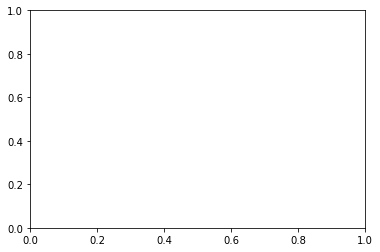

In [32]:
import matplotlib.pyplot as plt

value1 = [(df['secondarycategory']== 'Zigeuner')]
value2=[(df['secondarycategory']=='Juden')]
value3=[(df['secondarycategory']=='Fahrende Leute')]

box_plot_data=[value1,value2,value3]

box=plt.boxplot(box_plot_data,vert=0,patch_artist=True,labels=['Zigeuner','Juden','Fahrende Leute'],

            )

colors = ['cyan', 'lightblue', 'lightgreen']

for patch, color in zip(box['boxes'], colors):

    patch.set_facecolor(color)

plt.show()


In [33]:
df_bern = df[ ['date', 'title', 'secondarycategory', 'subcategories', 'archive'] ][
        (df['secondarycategory']=='Zigeuner') | 
        (df['secondarycategory']=='Juden') |
        (df['secondarycategory']=='Fahrende Leute') 
    ]

In [34]:
# create excel writer object
writer = pd.ExcelWriter('data_csv_output/Bern_Randgruppen.xlsx')
# write dataframe to excel
df_bern.to_excel(writer)
# save the excel
writer.save()
print('DataFrame is written successfully to Excel File.')

DataFrame is written successfully to Excel File.


Dankzij Eric vd Linden

In [35]:
import pandas as pd
#load Pandas for data structures and operations for manipulating numerical tables and time series.
import numpy as np
#Load NumPy for linear algebra/ Numerical Python
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv ('data_csv_output/bern_matters_expanded.csv')


In [37]:
df.head()

,LawID,SubLawID,CategoryNumber,MainCategory,SecondaryCategory,SubCategories,URI,LegislatorID,LegislatorName,LegislatorTitle,...,RelatesTo,Publication,Archive,Title,Facs,URL,Matters,Dirty,Controlled,Links
0,BER.01.001.4968,BER.01.001.4968.06412.0,4.2,Forst- und Bodennutzung,Forst,"Forstfrevel,Kein näheres Datum",NaN,BER.01.001,Schultheiß und Kleiner und Großer Rat der Stad...,NaN,...,NaN,NaN,"StAB, A I 480, S. 231",Verpott in der Statt Wäldenn khein Holz zefellen.,NaN,NaN,"(BER.01.001.4968.06412.0,,4.2,Forst- und Boden...",NaN,NaN,NaN
1,BER.01.001.0001,BER.01.001.0001.00001.0,1.1,Religionsangelegenheiten,Geistlichkeit,Amtsausübung; Amtsführung; Predigt; Aufsicht; ...,NaN,BER.01.001,Schultheiß und Kleiner und Großer Rat der Stad...,NaN,...,NaN,NaN,"StAB, A I 479, fol. 1v-10v",NaN,NaN,NaN,"(BER.01.001.0001.00001.0,,1.1,Religionsangeleg...",NaN,NaN,NaN
2,BER.01.001.0001,BER.01.001.0001.00004.0,1.1,Religionsangelegenheiten,Kirchenzucht,Fasten; Toleranz; Messe,NaN,BER.01.001,Schultheiß und Kleiner und Großer Rat der Stad...,NaN,...,NaN,NaN,"StAB, A I 479, fol. 1v-10v",NaN,NaN,NaN,"(BER.01.001.0001.00001.0,,1.1,Religionsangeleg...",NaN,NaN,NaN
3,BER.01.001.0001,BER.01.001.0001.00002.0,1.1,Religionsangelegenheiten,Kirchenorganisation,Pfarrstellenbesetzung; Abgaben; Vermögen; Stif...,NaN,BER.01.001,Schultheiß und Kleiner und Großer Rat der Stad...,NaN,...,NaN,NaN,"StAB, A I 479, fol. 1v-10v",NaN,NaN,NaN,"(BER.01.001.0001.00001.0,,1.1,Religionsangeleg...",NaN,NaN,NaN
4,BER.01.001.0001,BER.01.001.0001.00006.0,1.1,Religionsangelegenheiten,Klosterwesen/Orden,Verbot; Austritt; Bruderschaft,NaN,BER.01.001,Schultheiß und Kleiner und Großer Rat der Stad...,NaN,...,NaN,NaN,"StAB, A I 479, fol. 1v-10v",NaN,NaN,NaN,"(BER.01.001.0001.00001.0,,1.1,Religionsangeleg...",NaN,NaN,NaN


In [ ]:
dfw=df[['LawID','SubLawID','CategoryNumber','MainCategory','SecondaryCategory','SubCategories','Datum','Date1','Date','Year','Month','Day','Archive']]

In [ ]:
dfw.head(2)

In [ ]:
# make een dataframe met alleen cat. 1.3
dfcnm13=dfw[dfw['CategoryNumber']==1.3]

In [ ]:
# Describe is een eerste stap voor statistiek
#dfcnm13.info()
dfcnm13.describe()
#dfcnm13.head(5)

In [ ]:
# Sort data met inplace true wordt de data blijvend aangepast in de nieuwe dataframe. bij false niet.
# Er is wel iets vreemds met inplace=true wat ik nog niet begrijp dus maak ik een copie van de dataframe
# ascending=True is standaard 
df13_sort=dfcnm13.loc[:].sort_values(by=['Year', 'Month', 'Day'])

In [ ]:
#bewaar dataframe als csv om in een ander programma te gebruiken
df13_sort.to_csv('df13_sort.csv', index=False)

Voor het maken van een lineplot moet je cijfers met cijfers vergelijken. Daarom groupby year en dan by SecondaryCategory en vervolgens tel je de frequentie van SecondaryCategory per jaar. dan kun je dus een lineplot maken met Year als x-as en SecondaryCategory_Count als y-as.

In [ ]:
dfcnm13_gby=dfcnm13.groupby(["Year","SecondaryCategory"])["SecondaryCategory"].count()

In [ ]:
#maak van het grouped object een nieuwe dataframe
dfcnm13_df_by_year = pd.DataFrame(data=dfcnm13_gby)

In [ ]:
# zorgt ervoor dat de dataframe drie kolommen heeft. 
dff=dfcnm13_df_by_year.add_suffix('_Count').reset_index()

In [ ]:
dff[(dff["SecondaryCategory"]=="Fahrende Leute")]

In [ ]:
f, ax = plt.subplots(figsize=(20, 16))
dx=sns.lineplot(data=dff, x="Year",y="SecondaryCategory_Count", hue="SecondaryCategory", ax=ax)
dx.set(xticks=dff.Year.values)

Voor het maken van een histplot is het niet nodig om groupby te doen. Hier meet je de frequentie van 'Year' in combinatie met SecondaryCategory/Fahrende Leute, Zigeuner, Juden. Bij Seaborn doe je dat door het atribuut hue de waarde te geven van de kolom van de categorieën die wil meten, hier dus SecondaryCategory. multiple="dodge" betekend dat alle categorieën naast elkaar komen. Je kunt hier ook stack kiezen, op elkaar dfcnm13 is dus de dataset waar de plot van gemaakt moet worden. binwidth=10 is dus hoeveel jaren er samen genomen moeten worden. 10 is dus periodes als 1700-1710 etc. kde=True daarmee wordt de trendlijn getekend.

In [ ]:
f, ax = plt.subplots(figsize=(20, 15))
ax.set_ylabel('Frequency per decade')
ax.set_xlabel('Year')
ax.set_title('Second category by decade 1530-1800')
plt.rc('font', size=22)          # controls default text sizes
plt.rc('axes', titlesize=30)     # fontsize of the title
plt.rc('axes', labelsize=22)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=18)    # legend fontsize
plt.rc('figure', titlesize=24)  # fontsize of the figure title

sns.despine(f)
sns.histplot(
    dfcnm13,
    x="Year", hue="SecondaryCategory",
    multiple="dodge",
    palette="bright",
    edgecolor=".3",
    linewidth=.5,
    binwidth=10,
    kde=True
)


Voor het maken van een histplot is het niet nodig om groupby te doen. Hier meet je de frequentie van 'Year' in combinatie met SecondaryCategory/Fahrende Leute, Zigeuner, Juden. Bij Seaborn doe je dat door het atribuut hue de waarde te geven van de kolom van de categorieën die wil meten, hier dus SecondaryCategory. multiple="dodge" betekend dat alle categorieën naast elkaar komen. Je kunt hier ook stack kiezen, op elkaar dfcnm13 is dus de dataset waar de plot van gemaakt moet worden. binwidth=10 is dus hoeveel jaren er samen genomen moeten worden. 10 is dus periodes als 1700-1710 etc. kde=True daarmee wordt de trendlijn getekend.

In [ ]:
f, ax = plt.subplots(figsize=(20, 15))
ax.set_ylabel('Frequency per decade')
ax.set_xlabel('Year')
ax.set_title('Second category by decade 1530-1800')
plt.rc('font', size=22)          # controls default text sizes
plt.rc('axes', titlesize=30)     # fontsize of the title
plt.rc('axes', labelsize=22)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=18)    # legend fontsize
plt.rc('figure', titlesize=24)  # fontsize of the figure title

sns.despine(f)
sns.histplot(
    dfcnm13,
    x="Year", hue="SecondaryCategory",
    multiple="dodge",
    palette="bright",
    edgecolor=".3",
    linewidth=.5,
    binwidth=10,
    kde=True
)


In [ ]:
g = sns.relplot(
    data=dff,
    x="Year", y="SecondaryCategory_Count",
    hue="SecondaryCategory"
    #palette=cmap, sizes=(10, 200),
)

In [ ]:
# een manier om te checken en nieuwe slices van de dataframe te maken.
#dfcnm13[(dfcnm13["SecondaryCategory"]=="Fahrende Leute") & (dfcnm13["Year"]==1795)]
dfcnm13[(dfcnm13["SecondaryCategory"]=="Fahrende Leute") & (dfcnm13["Year"]>=1740) & (dfcnm13["Year"]<=1750)]

In [ ]:
dfcnm13[(dfcnm13["SecondaryCategory"]=="Zigeuner") & (dfcnm13["Year"]>=1576) & (dfcnm13["Year"]<=1703)]

In [ ]:
dfcnm13[(dfcnm13["SecondaryCategory"]=="Juden") & (dfcnm13["Year"]>=1576) & (dfcnm13["Year"]<=1703)]

In [ ]:
dfcnm13[(dfcnm13["SecondaryCategory"]=="Fahrende Leute") & (dfcnm13["Year"]>=1576) & (dfcnm13["Year"]<=1625)]

In [ ]:
dfcnm13[(dfcnm13["SecondaryCategory"]=="Fahrende Leute") & (dfcnm13["Year"]>=1625) & (dfcnm13["Year"]<=1675)]

In [ ]:
dfcnm13[(dfcnm13["SecondaryCategory"]=="Fahrende Leute") & (dfcnm13["Year"]>=1675) & (dfcnm13["Year"]<=1703)]

In [ ]:
dfcnm13[(dfcnm13["SecondaryCategory"]=="Fahrende Leute") & (dfcnm13["Year"]>=1576) & (dfcnm13["Year"]<=1703)]